In [22]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt


In [23]:
# FUNCIONES DE ACTIVACION
class function(object):
    def __init__(self,funcion,derivative=None):
        self.F=funcion
        self.D=derivative

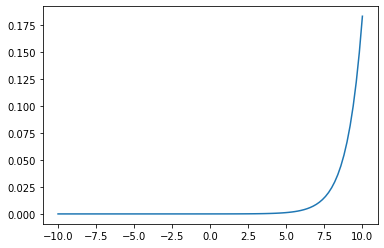

In [24]:


#funciones de activación

def cross_entropy(predictions, targets, epsilon=1e-12):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions+1e-9))/N
    return ce



lineal=function(funcion=lambda x:x,derivative=lambda x:1)
sigm=function(funcion=lambda x: 1 / (1 + np.e ** (-x)),derivative=lambda x: x * (1 - x))
tanh=function(funcion=lambda x: 2 / (1 + np.e ** (2*x))-1,derivative=lambda x:1-((2 / (1 + np.e ** (2*x)))-1)**2)

softmax=function(funcion=lambda x: np.exp(x) / np.sum(np.exp(x), axis=0), derivative=lambda x:x*(1-x))
relu=function(funcion=lambda x: np.maximum(0, x) ,derivative=lambda x: np.where(x<=0,0,1))

# funciones de coste
l2_cost=function(funcion=lambda Yp, Yr: np.mean((Yp - Yr) ** 2) ,derivative=lambda Yp, Yr: (Yp - Yr))

_x = np.linspace(-10, 10, 100)

plt.plot(_x, softmax.F(_x),"tab:blue")



In [25]:
# CLASE DE LA CAPA DE LA RED
from IPython.display import clear_output
import time

class neural_layer():
 
  def __init__(self, n_conn, n_neur, act_f):
    self.act = act_f
    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1
    
# creación de una red neuronal según topologia
def create_nn(topology):
  nn = []
  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l][0], topology[l+1][0], topology[l][1]))
  return nn
    
# fucnción de predicción (fordware pass)    
def predict(neural_net, X):
  
  out = [(None, X)] #primer data necesario
  
  # Forward pass
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act.F(z)
    out.append((z, a))
  return out[-1][1]
  
# función retropropagación del error
def backward_pass(neural_net, X, Y, l2_cost, lr=0.5,momentun=1,batch_size=1):
  sx=np.shape(X)
  sy=np.shape(Y)
  X=X.reshape(1,sx[0])
  Y=Y.reshape(1,sy[0])
  out = [(None, X)] #primer data necesario
  
  # Forward pass
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act.F(z)
    out.append((z, a))
  acc=np.round(a)==Y
  # Backward pass 
  deltas = []
  for l in reversed(range(0, len(neural_net))):
    z = out[l+1][0]
    a = out[l+1][1]
    if l == len(neural_net) - 1:
      deltas.insert(0, l2_cost.D(a, Y) * neural_net[l].act.D(a))
    else:
      deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act.D(a))
    _W = neural_net[l].W
 
    # Gradient descent
    neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr   
    neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
  return out[-1][1],acc


# función de entrenamiento de la red
def train(neural_net,X,Y,l2_cost,lr=0.5,epoch=1000,momentun=1,batch_size=1):
    loss = []
    ACC =[]
    for i in range(epoch):
        account=0
        # Entrenemos a la red!
        for j in range(len(X)):
            pY,acc = backward_pass(neural_n, X[j,:], Y[j,:], l2_cost, lr,momentun,batch_size)
            if acc.all():
                account+=1
        print("Epoch={}, Loss={} Accuracy={}".format(i,round(l2_cost.F(pY,Y[j,:]),15),round(account/len(Y),3)),end="")
        clear_output(wait=True)
        ACC.append(account/len(Y))    
        loss.append(l2_cost.F(pY,Y[j,:]))
     
    return loss,ACC

# Realiza un ejemplo de clasificación y regresión
Hay varios datasets dentro del directorio o si lo prefieres puede bajar más de esta web:
https://www.mldata.io/datasets/

Debes realizar, usando este perceptrón un ajuste de una red para un dataset de clasificación y otro de regresión
    - Nota: la regresión da una aproximación por lo que sólo tiene una neurona de salida

Ajusta los vectores de entrada y normaliza los datos a flotantes...
Guarda algunos valores separados para luego probar tu red
Entrena la red usando varias topologias no muy complicadas.
No te preocupes si el error no es muy bajo. 
Indica cómo crees que se comporta la red que has definido

En el perceptrón se han añadido dos Hiperparámetros, Bath_size y momentun que ya hemos visto en teoría.
Debes intentar modificar el algoritmo backpropagation para que se pueda entrenar:
    - Usando un valor distinto de batch_size. (ahora es solo 1)
    - Añadir el momentun al algoritmo base de tal forma que tenga en cuenta el delta anterior en la aproximación al punto de convergencia

In [38]:
#ATRIBUTOS del dataset:
#sex,length,diameter,height,whole_weight,shucked_weight,
#viscera_weight,shell_weight,rings

import csv
X=[]
Y=[]
with open('abalone_dataset.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        #row=row[0].split(",")
        if row[0] == "M":   #abulón MASCULINO
            sex=1.0
        if row[0] == "F":   #abulón FEMENINO
            sex=2.0
        else:               #abulón INFANTIL
            sex = 3.0
            
        X.append([float(sex/10),     #sex
                  float(row[1])/10,  #length
                  float(row[2])/10,  #diameter
                  float(row[3])/10,  #height
                  float(row[4])/10,  #whole_weight
                  float(row[5])/10,  #shucked_weight
                  float(row[6])/10,  #viscera_weight
                  float(row[7])/10]) #shell_weight

        Y.append([float(row[8])/10]) #rings   .  Predictor


Xtrain=np.array(X)
Ytrain=np.array(Y)

print(np.shape(Xtrain))


(4177, 8)


In [39]:
# definicion de la red
#topology = [(4,sigm),(16,sigm),(3,sigm)] #buena configuracion
topology = [(8,sigm),(16,sigm),(3,sigm),(3,softmax)]
neural_n = create_nn(topology)  

# FUNCION DE ENTRENAMIENTO

epoch=400
lr=0.2
batch_size=1
momentun=1
loss = []
accuracy=[]

loss,accuracy=train(neural_n,Xtrain,Ytrain,l2_cost,lr,epoch,momentun,batch_size)

Epoch=399, Loss=0.040000638949835 Accuracy=0.152

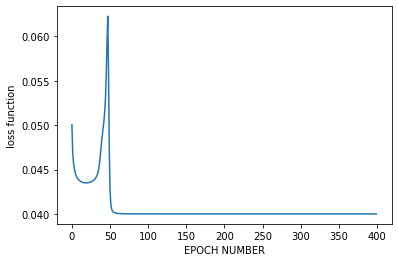

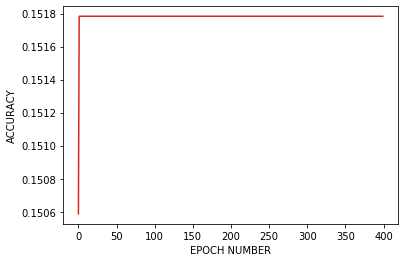

In [43]:
plt.plot(range(len(loss)), loss)
plt.ylabel("loss function")
plt.xlabel("EPOCH NUMBER")
plt.show()
plt.plot(range(len(accuracy)), accuracy, "tab:red")
plt.ylabel("ACCURACY")
plt.xlabel("EPOCH NUMBER")
plt.show()
  
 

In [41]:
# VISUALIZACIÓN Y TEST
#  ahora podemos interrogar. el primer valor es el bias
def print_predict(X,Y):
    for i in range(len(X)):
        sal=np.round(predict(neural_n,X[i]))
        print("predecir ",X[i],"--",Y[i]," predict: ",sal)

print_predict(Xtrain,Ytrain)
print("::::::::::::::::::::::::::::")


predecir  [0.3     0.0455  0.0365  0.0095  0.0514  0.02245 0.0101  0.015  ] -- [1.5]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.035   0.0265  0.009   0.02255 0.00995 0.00485 0.007  ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.053   0.042   0.0135  0.0677  0.02565 0.01415 0.021  ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.044   0.0365  0.0125  0.0516  0.02155 0.0114  0.0155 ] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.033   0.0255  0.008   0.0205  0.00895 0.00395 0.0055 ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0425  0.03    0.0095  0.03515 0.0141  0.00775 0.012  ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.053   0.0415  0.015   0.07775 0.0237  0.01415 0.033  ] -- [2.]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0545  0.0425  0.0125  0.0768  0.0294  0.01495 0.026  ] -- [1.6]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0475  0.037   0.0125  0.05095 0.02165 0.01125 0.0165 ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.

predecir  [0.3    0.064  0.051  0.0175 0.1368 0.0515 0.0266 0.057 ] -- [2.1]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.056   0.045   0.016   0.10235 0.0429  0.0268  0.03   ] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.062   0.0475  0.0175  0.10165 0.04355 0.0214  0.0325 ] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0645  0.051   0.02    0.15675 0.0621  0.0367  0.046  ] -- [1.2]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.062   0.049   0.019   0.1218  0.05455 0.02965 0.0355 ] -- [1.3]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.063   0.048   0.015   0.10525 0.0392  0.0336  0.0285 ] -- [1.2]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.063   0.05    0.0185  0.1383  0.054   0.03315 0.038  ] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.063   0.048   0.016   0.1199  0.05265 0.0335  0.0315 ] -- [1.1]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0585  0.046   0.017   0.09325 0.0365  0.0271  0.029  ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0615  0.0

predecir  [0.2     0.0605  0.0495  0.017   0.12385 0.0528  0.02465 0.039  ] -- [1.4]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.062   0.047   0.014   0.10325 0.03605 0.0224  0.036  ] -- [1.5]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.063   0.05    0.017   0.13135 0.05595 0.0267  0.04   ] -- [2.]  predict:  [[1. 1. 1.]]
predecir  [0.3    0.063  0.0515 0.0165 0.1352 0.0488 0.0349 0.045 ] -- [2.]  predict:  [[1. 1. 1.]]
predecir  [0.2    0.063  0.05   0.0155 0.1005 0.0367 0.0199 0.036 ] -- [1.6]  predict:  [[1. 1. 1.]]
predecir  [0.3    0.0545 0.041  0.014  0.0625 0.0223 0.016  0.0235] -- [1.3]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.067   0.054   0.0165  0.15015 0.0518  0.0358  0.0505 ] -- [1.4]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.049   0.038   0.012   0.0529  0.02165 0.0139  0.0155 ] -- [1.1]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.049   0.039   0.0135  0.05785 0.02465 0.0123  0.02   ] -- [1.3]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.029   0.0225  0.007   0.

predecir  [0.3     0.032   0.024   0.0085  0.017   0.00655 0.0047  0.0049 ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.031   0.0225  0.0075  0.01295 0.00455 0.00335 0.0044 ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0235  0.017   0.0055  0.00515 0.0018  0.00105 0.00195] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0345  0.0255  0.008   0.0169  0.006   0.00425 0.0054 ] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0485  0.038   0.014   0.0673  0.02175 0.013   0.0195 ] -- [1.8]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.05    0.0385  0.0115  0.06785 0.02945 0.0138  0.0195 ] -- [1.2]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.05    0.0385  0.0105  0.0498  0.01795 0.01095 0.017  ] -- [1.7]  predict:  [[1. 1. 1.]]
predecir  [0.3    0.0465 0.036  0.0105 0.0498 0.0214 0.0116 0.014 ] -- [1.5]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0525  0.0405  0.016   0.0658  0.02655 0.01125 0.0225 ] -- [1.2]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0425  0

predecir  [0.3     0.0505  0.044   0.014   0.08275 0.03415 0.01855 0.0239 ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0525  0.0395  0.013   0.07635 0.03375 0.01425 0.0225 ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.054   0.0405  0.0125  0.0891  0.04815 0.01915 0.0202 ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.054   0.042   0.014   0.0805  0.0369  0.01725 0.021  ] -- [1.1]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0545  0.044   0.0135  0.09185 0.0429  0.02015 0.02375] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.055   0.043   0.0125  0.0923  0.04035 0.0175  0.0283 ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.055   0.045   0.015   0.10145 0.0407  0.02015 0.02875] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.055   0.045   0.015   0.0875  0.0362  0.01755 0.02765] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0555  0.0435  0.0145  0.09685 0.04985 0.0168  0.02385] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0

predecir  [0.2     0.0695  0.0535  0.0175  0.18385 0.08035 0.0396  0.0503 ] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0705  0.0535  0.018   0.1685  0.0693  0.042   0.04045] -- [1.2]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.071   0.0565  0.0205  0.2198  0.1012  0.05225 0.05475] -- [1.1]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0715  0.0565  0.0175  0.19525 0.07645 0.04185 0.04135] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0715  0.0525  0.0185  0.156   0.06655 0.0383  0.0405 ] -- [1.1]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0735  0.06    0.022   0.2555  0.11335 0.044   0.06   ] -- [1.1]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0765  0.06    0.022   0.2302  0.1007  0.0509  0.06205] -- [1.2]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0185  0.013   0.0045  0.0029  0.0012  0.00075 0.00095] -- [0.4]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0195  0.015   0.0045  0.00375 0.0018  0.0006  0.0011 ] -- [0.3]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.

predecir  [0.3     0.0345  0.0255  0.0085  0.02005 0.0105  0.0037  0.005  ] -- [0.5]  predict:  [[1. 1. 1.]]
predecir  [0.3    0.035  0.027  0.0075 0.0215 0.01   0.0036 0.0065] -- [0.6]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.035   0.0255  0.009   0.01785 0.00855 0.00305 0.00525] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.036   0.027   0.0085  0.0196  0.00875 0.0035  0.0064 ] -- [0.4]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0365  0.027   0.0085  0.01875 0.0081  0.0042  0.0058 ] -- [0.6]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0365  0.027   0.0085  0.0196  0.00825 0.00375 0.006  ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0365  0.0265  0.0085  0.0213  0.00945 0.0049  0.006  ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.037   0.029   0.009   0.02445 0.0089  0.00655 0.0075 ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.037   0.028   0.0085  0.0217  0.01095 0.0035  0.0062 ] -- [0.6]  predict:  [[1. 1. 1.]]
predecir  [0.3    0.0375 0.

predecir  [0.3     0.0405  0.031   0.0095  0.03425 0.01785 0.0064  0.00855] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0405  0.029   0.009   0.02825 0.0112  0.0075  0.00815] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0405  0.03    0.0105  0.0304  0.01455 0.0061  0.00805] -- [0.6]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.041   0.032   0.0095  0.02905 0.0141  0.0063  0.0073 ] -- [0.5]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0415  0.0315  0.0115  0.03895 0.02015 0.0065  0.0103 ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0425  0.034   0.0105  0.0389  0.02015 0.00905 0.0088 ] -- [0.6]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.043   0.034   0.0105  0.04405 0.02385 0.00745 0.01075] -- [0.6]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.044   0.034   0.0105  0.0369  0.0164  0.008   0.01015] -- [0.5]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.044   0.032   0.012   0.04565 0.02435 0.0092  0.01025] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     

predecir  [0.3     0.058   0.0445  0.0125  0.07095 0.0303  0.01405 0.0235 ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0585  0.0445  0.014   0.0913  0.04305 0.02205 0.0253 ] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.3    0.059  0.049  0.0165 0.1207 0.0559 0.0235 0.0309] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.3    0.059  0.045  0.0145 0.1022 0.0428 0.0268 0.0265] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.059   0.046   0.0145  0.09015 0.0419  0.01785 0.026  ] -- [1.1]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0595  0.0435  0.015   0.09    0.04175 0.017   0.0265 ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0595  0.045   0.014   0.0838  0.03965 0.0194  0.0217 ] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0595  0.045   0.0145  0.0959  0.0463  0.02065 0.02535] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0595  0.046   0.015   0.08335 0.0377  0.01925 0.0235 ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.06    0.046   0.015

predecir  [0.2     0.051   0.04    0.012   0.07005 0.0347  0.01105 0.0195 ] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0515  0.0415  0.0135  0.07125 0.0285  0.0152  0.0245 ] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0515  0.042   0.015   0.06725 0.02555 0.01335 0.0235 ] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0515  0.0385  0.011   0.05785 0.0253  0.016   0.014  ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.052   0.041   0.011   0.05185 0.02165 0.00915 0.0184 ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.052   0.0415  0.014   0.06375 0.0308  0.01335 0.0168 ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.052   0.0395  0.0125  0.05805 0.02445 0.0146  0.0165 ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.052   0.038   0.0115  0.06645 0.03285 0.017   0.01425] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.052   0.0385  0.0115  0.0581  0.02555 0.0156  0.0143 ] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.05

predecir  [0.3     0.049   0.037   0.011   0.0538  0.0271  0.01035 0.0139 ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.05    0.039   0.0135  0.07815 0.0361  0.01575 0.02385] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.05    0.038   0.014   0.06355 0.0277  0.0143  0.01785] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0505  0.0385  0.013   0.06435 0.03135 0.0149  0.01515] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0525  0.0385  0.01    0.05115 0.0246  0.01005 0.01455] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0535  0.042   0.0125  0.0738  0.0355  0.01895 0.01795] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0535  0.042   0.013   0.0699  0.03125 0.01565 0.02035] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.054   0.0385  0.014   0.07655 0.03265 0.0116  0.02365] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.054   0.042   0.013   0.07505 0.0368  0.01675 0.01845] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.2     0

predecir  [0.2     0.055   0.0465  0.018   0.12125 0.03245 0.0205  0.0525 ] -- [2.7]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.066   0.0505  0.02    0.16305 0.04865 0.0297  0.061  ] -- [1.8]  predict:  [[1. 1. 1.]]
predecir  [0.3    0.0565 0.047  0.0195 0.1142 0.0387 0.0258 0.035 ] -- [1.7]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0595  0.0495  0.0235  0.1366  0.05065 0.0219  0.052  ] -- [1.3]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.063   0.051   0.023   0.1539  0.05635 0.02815 0.057  ] -- [1.7]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.043   0.0325  0.012   0.0445  0.0165  0.00995 0.0155 ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0455  0.035   0.014   0.05725 0.01965 0.01325 0.0175 ] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.033   0.026   0.008   0.019   0.00765 0.00385 0.0065 ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.2    0.0515 0.0415 0.013  0.0764 0.0276 0.0196 0.025 ] -- [1.3]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0495  0.039   0

predecir  [0.3    0.054  0.0415 0.017  0.0879 0.0339 0.0208 0.0255] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0475  0.0355  0.0125  0.04625 0.0186  0.0107  0.0145 ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0445  0.0335  0.014   0.04565 0.01785 0.0114  0.014  ] -- [1.1]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.05    0.0355  0.014   0.0528  0.02125 0.0149  0.014  ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.05    0.038   0.0135  0.05835 0.02295 0.01265 0.018  ] -- [1.2]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.055   0.0435  0.017   0.0884  0.02875 0.01645 0.028  ] -- [1.4]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0275  0.0205  0.008   0.0096  0.0036  0.00185 0.003  ] -- [0.6]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.035   0.0265  0.009   0.01855 0.00745 0.00415 0.006  ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.037   0.0285  0.0105  0.027   0.01125 0.00585 0.00835] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.2    0.042  0.0

predecir  [0.2     0.055   0.0425  0.0125  0.0964  0.05475 0.0159  0.0215 ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.2    0.0555 0.0425 0.014  0.0963 0.044  0.0224 0.024 ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.057   0.0445  0.015   0.0995  0.0504  0.0185  0.02505] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.057   0.0435  0.014   0.08585 0.03905 0.0196  0.02295] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3    0.0575 0.045  0.0155 0.0948 0.0429 0.0206 0.0259] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.058   0.0445  0.0145  0.0888  0.041   0.01815 0.02425] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0585  0.045   0.016   0.09045 0.0405  0.02215 0.02335] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.059   0.0465  0.014   0.1046  0.04695 0.0263  0.0263 ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0595  0.047   0.0155  0.11775 0.0542  0.0269  0.031  ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0595  0.0465  

predecir  [0.3     0.046   0.0365  0.0115  0.0511  0.02365 0.0118  0.0123 ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0495  0.0375  0.012   0.0589  0.03075 0.01215 0.01405] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.05    0.0365  0.013   0.05945 0.0309  0.01085 0.01535] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.05    0.0375  0.012   0.0529  0.02235 0.0123  0.016  ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.052   0.04    0.0105  0.0872  0.04515 0.01615 0.01985] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.052   0.0395  0.0145  0.077   0.0424  0.0142  0.01895] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0525  0.043   0.0135  0.08435 0.04325 0.018   0.01815] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0535  0.0405  0.014   0.0818  0.0402  0.01715 0.0189 ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.054   0.042   0.014   0.08035 0.038   0.01805 0.021  ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.2     

predecir  [0.3    0.0475 0.0375 0.011  0.0456 0.0182 0.0099 0.016 ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.3    0.0495 0.033  0.01   0.044  0.0177 0.0095 0.015 ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.3    0.0495 0.0375 0.0115 0.0507 0.0241 0.0103 0.015 ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.05    0.038   0.0135  0.05285 0.0226  0.0123  0.0209 ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0515  0.0385  0.0125  0.0572  0.0237  0.01435 0.0165 ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.052   0.041   0.014   0.06625 0.02775 0.01555 0.0196 ] -- [1.1]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.052   0.0395  0.0115  0.06445 0.03155 0.01245 0.0186 ] -- [1.1]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0525  0.04    0.011   0.06275 0.03015 0.0126  0.018  ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0535  0.042   0.0145  0.06885 0.0273  0.01515 0.0237 ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0535  0.041   0.012   

predecir  [0.3     0.03    0.024   0.009   0.0161  0.00725 0.0039  0.005  ] -- [0.6]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0435  0.035   0.0125  0.0459  0.0197  0.01145 0.0145 ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.3    0.0455 0.0375 0.0125 0.0533 0.0233 0.0106 0.0185] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.048   0.038   0.013   0.06175 0.03    0.0142  0.0175 ] -- [1.2]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.043   0.035   0.0105  0.0366  0.01705 0.00855 0.011  ] -- [0.6]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0435  0.035   0.0105  0.04195 0.0194  0.01005 0.013  ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.03    0.023   0.0075  0.015   0.00605 0.0042  0.0045 ] -- [0.5]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0575  0.048   0.015   0.08745 0.0375  0.0193  0.029  ] -- [1.2]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0505  0.0385  0.011   0.0655  0.03185 0.015   0.0185 ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0455  

predecir  [0.3     0.0465  0.037   0.01    0.05055 0.0234  0.011   0.014  ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0465  0.0355  0.0115  0.04705 0.01955 0.0118  0.0126 ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.048   0.037   0.013   0.0643  0.0349  0.01155 0.0135 ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0485  0.037   0.01    0.0513  0.0219  0.01075 0.013  ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.049   0.04    0.0115  0.0569  0.0256  0.01325 0.0145 ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0495  0.04    0.0145  0.0578  0.02545 0.01305 0.01645] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.05    0.0385  0.011   0.0596  0.03015 0.0104  0.0151 ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0505  0.039   0.012   0.05725 0.02555 0.01325 0.0146 ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.052   0.039   0.012   0.06435 0.02885 0.0157  0.0161 ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.3     

predecir  [0.3     0.0285  0.0225  0.007   0.01005 0.00425 0.00185 0.0035 ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0295  0.022   0.0085  0.01285 0.00585 0.0027  0.00365] -- [0.5]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.03    0.0225  0.0075  0.01345 0.0057  0.0028  0.0044 ] -- [0.5]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.03    0.022   0.0065  0.01195 0.0052  0.00155 0.0035 ] -- [0.5]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.036   0.0265  0.0085  0.01895 0.00725 0.00515 0.0055 ] -- [0.6]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.037   0.0275  0.0095  0.0257  0.01015 0.0055  0.00825] -- [0.6]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.039   0.029   0.009   0.02745 0.0135  0.00455 0.0078 ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0435  0.0325  0.01    0.0342  0.01335 0.00835 0.0105 ] -- [0.6]  predict:  [[1. 1. 1.]]
predecir  [0.3    0.044  0.034  0.0105 0.0344 0.0123 0.0081 0.0125] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.044   

predecir  [0.3     0.062   0.046   0.017   0.1127  0.0535  0.02635 0.0296 ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0625  0.047   0.017   0.11665 0.04605 0.02565 0.03945] -- [1.1]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.068   0.052   0.0185  0.1541  0.05985 0.0395  0.04575] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.068   0.054   0.0195  0.17825 0.05565 0.03235 0.04285] -- [1.1]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.068   0.052   0.0175  0.1543  0.07525 0.0351  0.0374 ] -- [1.1]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.071   0.0555  0.017   0.147   0.05375 0.038   0.0431 ] -- [1.2]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.05    0.0385  0.012   0.06335 0.02305 0.0125  0.0235 ] -- [1.4]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.0545  0.042   0.0175  0.0754  0.0256  0.01775 0.0275 ] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.046   0.0365  0.0115  0.04485 0.0165  0.0083  0.017  ] -- [1.4]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.

predecir  [0.3     0.0615  0.053   0.017   0.112   0.05775 0.02095 0.0286 ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.062   0.0465  0.014   0.1011  0.0479  0.02385 0.0255 ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0625  0.0505  0.0175  0.1131  0.05425 0.02265 0.0323 ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0625  0.048   0.0175  0.1065  0.04865 0.0259  0.0285 ] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.3    0.0635 0.048  0.0145 0.1181 0.0665 0.0229 0.0225] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.064   0.0525  0.0175  0.1382  0.0646  0.03115 0.037  ] -- [0.9]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.066   0.0505  0.019   0.14385 0.06775 0.0285  0.0178 ] -- [1.1]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.066   0.0485  0.0155  0.12275 0.061   0.0274  0.03   ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.066   0.0515  0.0155  0.14415 0.07055 0.03555 0.0335 ] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.2     0.068   0.0

predecir  [0.3     0.067   0.0525  0.02    0.17405 0.06205 0.0297  0.0657 ] -- [1.1]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0695  0.053   0.021   0.151   0.0664  0.04095 0.0385 ] -- [1.]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.0695  0.055   0.0195  0.16645 0.0727  0.036   0.0445 ] -- [1.1]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.077   0.0605  0.0175  0.20505 0.08005 0.0526  0.0355 ] -- [1.1]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.028   0.0215  0.007   0.0124  0.0063  0.00215 0.003  ] -- [0.6]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.033   0.023   0.008   0.014   0.00565 0.00365 0.0046 ] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.035   0.025   0.0075  0.01695 0.00835 0.00355 0.0041 ] -- [0.6]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.037   0.028   0.009   0.0218  0.00995 0.00545 0.00615] -- [0.7]  predict:  [[1. 1. 1.]]
predecir  [0.3     0.043   0.0315  0.0115  0.0384  0.01885 0.00715 0.011  ] -- [0.8]  predict:  [[1. 1. 1.]]
predecir  [0.3     0

In [42]:
print("Juan Antonio Silva Luján - Entrega02 (Perceptrón Múltiple - Regresión)")

Juan Antonio Silva Luján - Entrega02 (Perceptrón Múltiple - Regresión)
